## Machine Learning and Statistics, Winter 21/22

#### Overview of the scikit-learn Python library

* A clear and concise overview of the scikit-learn Python library.
* Demonstrations of three interesting scikit-learn algorithms. You may choose these yourself, based on what is covered in class or otherwise. .

Table of Contnets:

1.

## Machine learning

Machine Learning (ML) is basically that field of computer science with the help of which computer systems can provide sense to data in much the same way as human beings do. In simple words, ML is a type of artificial intelligence that extract patterns out of raw data by using an algorithm or method. The key focus of ML is to allow computer systems to learn from experience without being explicitly programmed or human intervention [1]. 

## What is Scikit Lean?

Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib [2].

Supervised vs Unsupervised Learning

* Support Vector Machines
* Linear Models
* Clustering

In [56]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets

import sklearn.model_selection as mod

import sklearn.linear_model as lm

from sklearn import svm 

from mlxtend.plotting import plot_decision_regions as pdr

from sklearn.metrics import confusion_matrix

In [2]:
filename = ".\iris.csv"

df = pd.read_csv(filename, header = None, names = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"])

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
display(df.isnull().sum())

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [7]:
correlation = df.corr()
correlation

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.117570,0.871754,0.817941
SepalWidth,-0.117570,1.000000,-0.428440,-0.366126
PetalLength,0.871754,-0.428440,1.000000,0.962865
PetalWidth,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

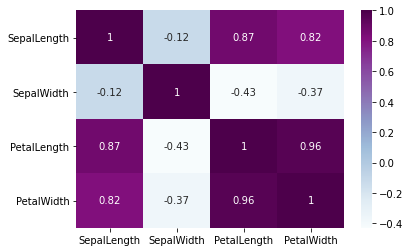

In [8]:
sns.heatmap(df.corr(),cmap="BuPu", annot=True)

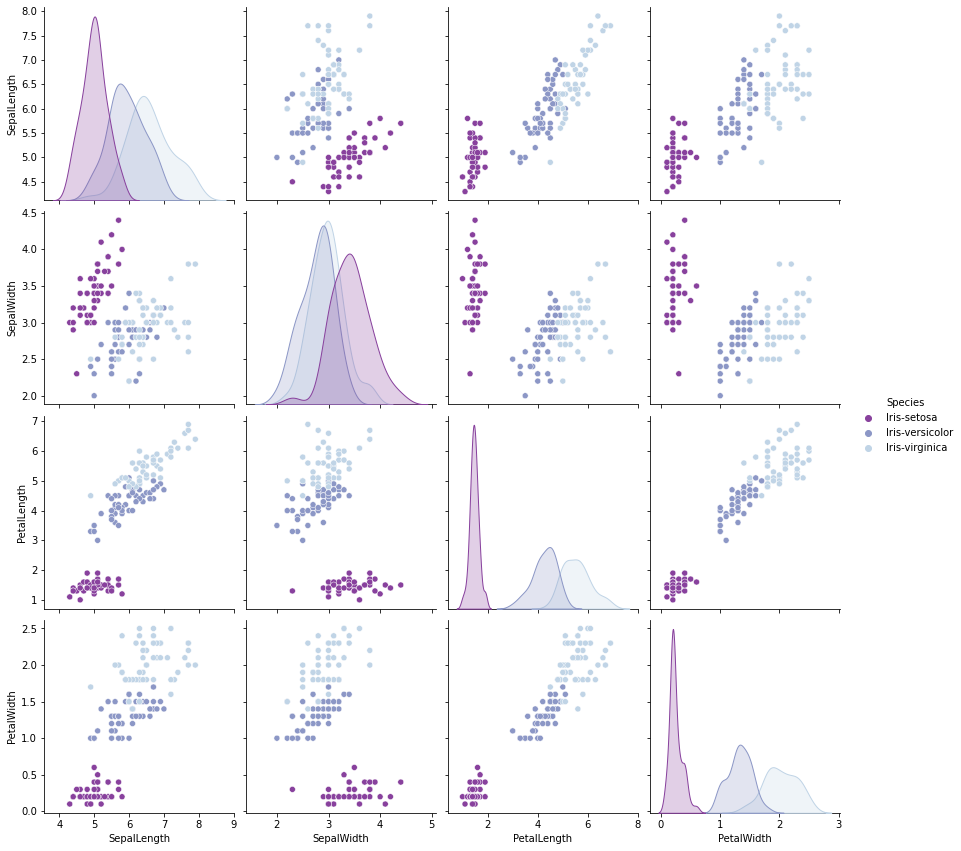

In [9]:
sns.pairplot(df,hue="Species", palette="BuPu_r", height=3)

In [10]:
setosa = df.loc [df ["Species"] == "Iris-setosa"]
versicolor = df.loc [df ["Species"] == "Iris-versicolor"]
virginica = df.loc [df ["Species"] == "Iris-virginica" ]

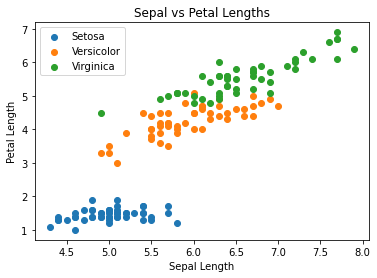

In [11]:
#Sepal sizes by species
plt.scatter(setosa["SepalLength"], setosa["PetalLength"], label='Setosa')
plt.scatter(versicolor["SepalLength"], versicolor["PetalLength"], label='Versicolor')
plt.scatter(virginica["SepalLength"], virginica["PetalLength"], label='Virginica')

#Set labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal vs Petal Lengths')

#Add a legend
plt.legend()
plt.show()

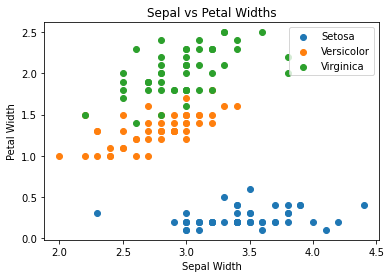

In [12]:
#Sepal sizes by species
plt.scatter(setosa["SepalWidth"], setosa["PetalWidth"], label='Setosa')
plt.scatter(versicolor["SepalWidth"], versicolor["PetalWidth"], label='Versicolor')
plt.scatter(virginica["SepalWidth"], virginica["PetalWidth"], label='Virginica')

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Sepal vs Petal Widths')

#Add a legend
plt.legend()
plt.show()

Text(0.5, 0.98, 'Box Plots')

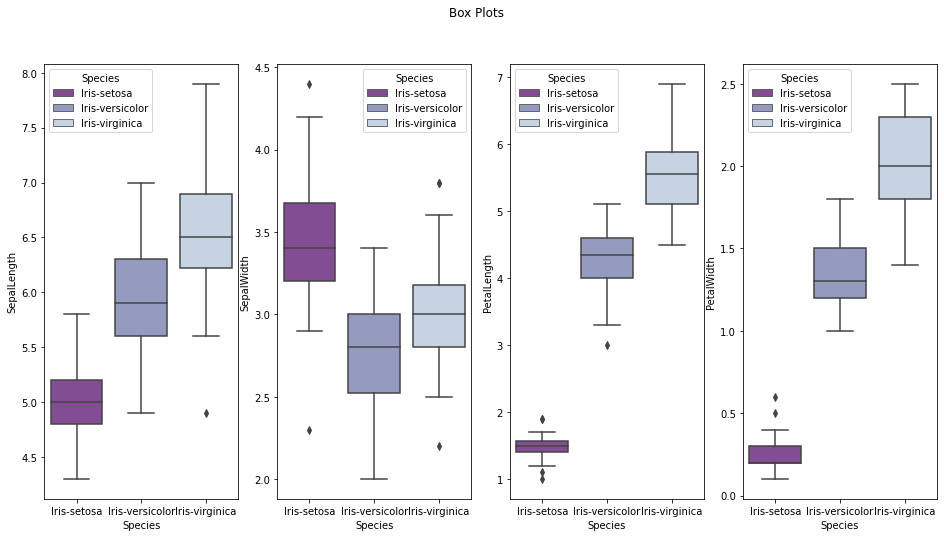

In [13]:
boxPlot, axes = plt.subplots(1,4, figsize=(16,8))
sns.boxplot(x="Species", y="SepalLength", hue="Species", data=df, palette="BuPu_r", ax=axes[0], dodge=False)    
sns.boxplot(x="Species", y="SepalWidth" , hue="Species", data=df, palette="BuPu_r", ax=axes[1], dodge=False)
sns.boxplot(x="Species", y="PetalLength", hue="Species", data=df, palette="BuPu_r", ax=axes[2], dodge=False)
sns.boxplot(x="Species", y="PetalWidth" , hue="Species", data=df, palette="BuPu_r", ax=axes[3], dodge=False)
plt.suptitle("Box Plots")

In [14]:
train, test = mod.train_test_split(df, test_size = 0.2)

In [15]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
11,4.8,3.4,1.6,0.2,Iris-setosa
112,6.8,3.0,5.5,2.1,Iris-virginica
36,5.5,3.5,1.3,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa


In [16]:
train.index

Int64Index([ 11, 112,  36,  19,  40, 122, 148, 128,  65,  90,
            ...
            139,   9,   5, 107,   1,  88,  43,  56,   7, 135],
           dtype='int64', length=120)

In [17]:
test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
95,5.7,3.0,4.2,1.2,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor
20,5.4,3.4,1.7,0.2,Iris-setosa
146,6.3,2.5,5.0,1.9,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica


In [18]:
test.index.size

30

In [19]:
#selecting our inputs and outputs 
inputs, outputs = train[['SepalLength','SepalWidth','PetalLength','PetalWidth']], train['Species']

In [20]:
inputs.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
11,4.8,3.4,1.6,0.2
112,6.8,3.0,5.5,2.1
36,5.5,3.5,1.3,0.2
19,5.1,3.8,1.5,0.3
40,5.0,3.5,1.3,0.3


In [21]:
outputs.head()

11        Iris-setosa
112    Iris-virginica
36        Iris-setosa
19        Iris-setosa
40        Iris-setosa
Name: Species, dtype: object

## Support Vector Machines

In [67]:
SepalLength = df.iloc[:,0].values
SepalWidth = df.iloc[:,1].values
PetalLength = df.iloc[:,2].values
PetalWidth = df.iloc[:,3].values

In [47]:
c = iris['target']

In [48]:
X = np.column_stack((SepalLength, PetalLength))
y = iris.target

In [49]:
X_train, X_test, y_train, y_test = mod.train_test_split(X,y, test_size = 0.2)

In [50]:
clf = svm.SVC(kernel = 'linear', C = 1)
clf.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [66]:
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2,
       1, 0, 0, 2, 1, 1, 2, 1])

In [51]:
clf.score(X_test,y_test)

0.9666666666666667

<AxesSubplot:>

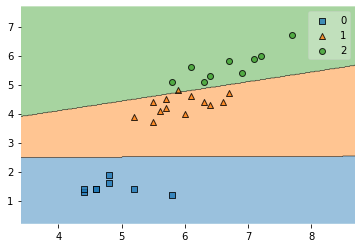

In [52]:
pdr(X = X_test, y = y_test, clf=clf, legend = 1)

In [53]:
clf.score(X_train,y_train)

0.9666666666666667

<AxesSubplot:>

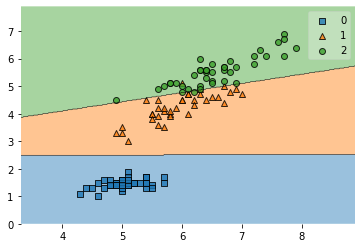

In [54]:
pdr(X = X_train, y = y_train, clf=clf, legend = 1)

<AxesSubplot:>

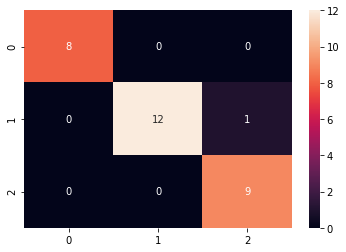

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

## Linear

## References

1. https://www.tutorialspoint.com/machine_learning_with_python/index.htm
2. https://www.tutorialspoint.com/scikit_learn/index.htm